In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

<ipython-input-16-28ea4932fd76>:134: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gL[j,k]= currX[j] * currdelL[k] # Fill in here


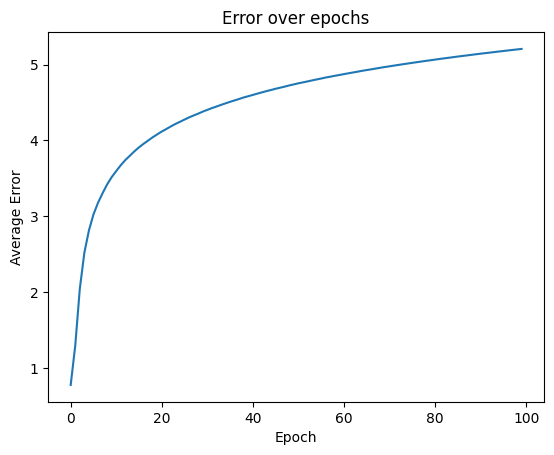

Confusion Matrix is from Part 1a is:  [[ 0  8]
 [ 0 12]]
Confusion Matrix from Part 1b is: [[ 8  0]
 [12  0]] hidden_layer_sizes:  (5, 5) training accuracy:  0.525 testing accuracy:  0.4


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Confusion Matrix from Part 1b is: [[ 7  1]
 [ 0 12]] hidden_layer_sizes:  (10, 10) training accuracy:  0.9625 testing accuracy:  0.95
Confusion Matrix from Part 1b is: [[ 7  1]
 [ 1 11]] hidden_layer_sizes:  (30, 10) training accuracy:  0.9625 testing accuracy:  0.9


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [16]:

def fit_NeuralNetwork(X_train,y_train,alpha,hidden_layer_sizes,epochs):
    #Enter implementation here

    # Initialize the epoch errors
    err=np.zeros((epochs,1))

    # Initialize the architecture
    N, d = X_train.shape
    X0 = np.ones((N,1))
    X_train = np.hstack((X0,X_train))
    d=d+1
    L = len(hidden_layer_sizes)
    L=L+2

    #Initializing the weights for input layer
    weight_layer = np.random.normal(0, 0.1, (d,hidden_layer_sizes[0])) #np.ones((d,hidden_layer_sizes[0]))
    weights = []
    weights.append(weight_layer) #append(0.1*weight_layer)

    #Initializing the weights for hidden layers
    for l in range(L-3):
        weight_layer = np.random.normal(0, 0.1, (hidden_layer_sizes[l]+1,hidden_layer_sizes[l+1]))
        weights.append(weight_layer)

    #Initializing the weights for output layers
    weight_layer= np.random.normal(0, 0.1, (hidden_layer_sizes[l+1]+1,1))
    weights.append(weight_layer)

    for e in range(epochs):
        choiceArray=np.arange(0, N)
        np.random.shuffle(choiceArray)
        errN=0
        for n in range(N):
            index=choiceArray[n]
            x=np.transpose(X_train[index])
            #TODO: Model Update: Forward Propagation, Backpropagation
            # update the weight and calculate the error
             # Forward propagation
            X, S = forwardPropagation(x, weights)

            # Compute error per sample
            eN = errorPerSample(X, y_train[index])
            errN += eN

            # Backpropagation to get gradients
            g = backPropagation(X, y_train[index], S, weights)

            # Update weights
            weights = updateWeights(weights, g, alpha)

        err[e]=errN/N
    return err, weights

def forwardPropagation(x, weights):
    #Enter implementation here
    l=len(weights)+1
    currX = x
    retS=[]
    retX=[]
    retX.append(currX)

    # Forward Propagate for each layer
    for i in range(l-1):

        currS= np.dot(currX, weights[i])
        #TODO: Dot product between the layer and the weight matrix
        retS.append(currS)
        currX=currS
        if i != len(weights)-1:
            for j in range(len(currS)):
                currX[j]= activation(currS[j])
        # TODO: Apply the activation
            currX= np.hstack((1,currX))
        else:
            currX= outputf(currS)
        #TODO: Apply the output activation
        retX.append(currX)
    return retX,retS

def errorPerSample(X,y_n):
    #Enter implementation here
    # The last layer's output is the last element in X
    x_L = X[-1]
    # Calculate the error using the error function implemented in Part 1
    eN = errorf(x_L, y_n)
    return eN

def backPropagation(X,y_n,s,weights):
    #Enter implementation here
    #x:0,1,...,L
    #S:1,...,L
    #weights: 1,...,L
    l=len(X)
    delL=[]

    # To be able to complete this function, you need to understand this line below
    # In this line, we are computing the derivative of the Loss function w.r.t the
    # output layer (without activation). This is dL/dS[l-2]
    # By chain rule, dL/dS[l-2] = dL/dy * dy/dS[l-2] . Now dL/dy is the derivative Error and
    # dy/dS[l-2]  is the derivative output.
    delL.insert(0,derivativeError(X[l-1],y_n)*derivativeOutput(s[l-2]))
    curr=0

    # Now, let's calculate dL/dS[l-2], dL/dS[l-3],...
    for i in range(len(X)-2, 0, -1): #L-1,...,0
        delNextLayer=delL[curr]
        WeightsNextLayer=weights[i]
        sCurrLayer=s[i-1]

        #Init this to 0s vector
        delN=np.zeros((len(s[i-1]),1))

        #Now we calculate the gradient backward
        #Remember: dL/dS[i] = dL/dS[i+1] * W(which W???) * activation
        for j in range(len(s[i-1])): #number of nodes in layer i - 1
            for k in range(len(s[i])): #number of nodes in layer i
                #TODO: calculate delta at node j
                delN[j]=delN[j]+ delNextLayer[k] * WeightsNextLayer[j, k] * derivativeActivation(sCurrLayer[j])
                # Fill in the rest

        delL.insert(0,delN)

    # We have all the deltas we need. Now, we need to find dL/dW.
    # It's very simple now, dL/dW = dL/dS * dS/dW = dL/dS * X
    g=[]
    for i in range(len(delL)):
        rows,cols=weights[i].shape
        gL=np.zeros((rows,cols))
        currX=X[i]
        currdelL=delL[i]
        for j in range(rows):
            for k in range(cols):
                #TODO: Calculate the gradient using currX and currdelL
                gL[j,k]= currX[j] * currdelL[k] # Fill in here
        g.append(gL)
    return g

def updateWeights(weights,g,alpha):
    #Enter implementation here
    nW=[]
    for i in range(len(weights)):
        rows, cols = weights[i].shape
        currWeight=weights[i]
        currG=g[i]
        for j in range(rows):
            for k in range(cols):
                #TODO: Gradient Descent Update
                currWeight[j,k]= currWeight[j, k] - alpha * currG[j, k]
        nW.append(currWeight)
    return nW

def activation(s):
    #Enter implementation here
    '''
    - Inputs: s
      The input to this function is a single-dimensional real-valued number. You will implement the ReLU function here.
    – Output: x
      The output will be the single-dimensional output of performing a ReLU operation on the inputs (i.e. x = θ(s) = ReLU (s)).
    '''
    x = np.where(s > 0, s, 0)
    return x

def derivativeActivation(s):
    #Enter implementation here

    '''
    -  Inputs: s
        The input to this function is a single-dimensional real-valued number. You will implement the derivative of the activation function (i.e. relu function) here.
    – Output: θ′(s)
        The output of this function is the derivative of the activation function θ(s).
    '''
    if s > 0:
      theta = 1
    else:
      theta = 0
    return theta

def outputf(s):
    #Enter implementation here
    '''
    – Inputs: s
      The input to this function is a single-dimensional real-valued number. You will implement the output function which is the logistic regression (i.e. sigmoid) function (i.e. 1 /1 + e^(s))
    – Output: x_L
        The output of this function is x L which is evaluated using the logistic regression function. This is a single-dimensional value.
    '''
    x_L = 1 / (1 + np.exp(-s))

    return x_L


def derivativeOutput(s):
    #Enter implementation here
    '''
    – Inputs: s
      The input to this function is a single-dimensional real-valued number. You will implement the
      derivative of the output function (i.e. sigmoid function).
    – Output: x L
      The output of this function is derivative of the output function evaluated at s (i.e. derivative
      of the sigmoid function).
    '''
    x_L = np.exp(-s) / ( (1 + np.exp(-s))**2)

    return x_L

def errorf(x_L,y):
    #Enter implementation here
    '''
    – Inputs: x L and y
      The input to this function is a single-dimensional real-valued number which is x L and a single
      dimensional discrete variable y which takes values in the set {+1,-1}. y is essentially the
      class that the training data point xn belongs to. x L is the output from the NN model which
      is obtained by applying forward propagation to xn. You will implement the log loss error
      function that evaluates the error introduced in the output of the NN with respect to the training
      observation.
    – Output: en
      The output of this function is en which is evaluated via the log loss error function: en(x L, y) =−Iy =+1log(x L) − Iy=−1log(1 − x L). The indicator function is denoted as Icondition which
      returns 1 if the condition in the subscript is true and 0 otherwise.
    '''
    if y == 1:
      e_n = -np.log(x_L)
    else:
      e_n = -np.log(1 - x_L)
    return e_n

def derivativeError(x_L,y):
    #Enter implementation here
    '''
    – Inputs: x L and y
      The input to this function is a single-dimensional real-valued number which is x L and a single
      dimensional discrete variable y which takes values in the set {+1,-1}. y is essentially the class
      that the training data point xn belongs to. x L is the output from the NN model which is
      obtained by applying forward propagation to xn. You will implement the derivative of the error
      function (i.e. log loss function) with respect to the input x L.
    – Output: ∂en
      The output of this function is the derivative of the error function evaluated at x L (i.e. derivative
      of the log loss function
    '''
    if y == 1:
      derivative_e_n = -1 / x_L
    else:
      derivative_e_n = -1 / 1 - x_L
    return derivative_e_n

def pred(x_n,weights):
    #Enter implementation here
    # Add a bias term in the beginning, act as an intercept
    x_n = np.hstack([1, x_n])
    # access the first element to get the activation of input layer
    X = forwardPropagation(x_n, weights)[0]
    # access the last element to get the activation of output layer, which is the final prediction
    output = X[-1]
    # assigning the class label based on a threshold of 0.5
    c = +1 if output >= 0.5 else -1
    return c


def confMatrix(X_train,y_train,w):
    #Enter implementation here
     # make predictions for each data in the training set, store it in an array
    y_pred = np.array([pred(x, w) for x in X_train])
    # compute the confusion matrix
    cm = confusion_matrix(y_train, y_pred)
    return cm


def plotErr(e,epochs):
    #Enter implementation here
    plt.plot(range(epochs), e)
    plt.title('Error over epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Average Error')
    plt.show()


def test_SciKit(X_train, X_test, Y_train, Y_test, hidden_layer_sizes):
    #Enter implementation here
    # initialize the built in classifier
    classifier = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=hidden_layer_sizes, random_state=1)
    # train NN using training dataset
    classifier.fit(X_train, Y_train)
    # obtain the predicted output for the testing data
    y_pred = classifier.predict(X_test)
    # compute the confusion matrix
    cm = confusion_matrix(Y_test, y_pred)

    # Compute accuracy
    y_pred_train = classifier.predict(X_train)
    training_accuracy = accuracy_score(Y_train, y_pred_train)
    y_pred_test = classifier.predict(X_test)
    testing_accuracy = accuracy_score(Y_test, y_pred_test)


    return cm, training_accuracy, testing_accuracy




def test_Part1():
    from sklearn.datasets import load_iris
    X_train, y_train = load_iris(return_X_y=True)
    X_train, X_test, y_train, y_test = train_test_split(X_train[50:],y_train[50:],test_size=0.2, random_state=1)

    for i in range(80):
        if y_train[i]==1:
            y_train[i]=-1
        else:
            y_train[i]=1
    for j in range(20):
        if y_test[j]==1:
            y_test[j]=-1
        else:
            y_test[j]=1

    err,w=fit_NeuralNetwork(X_train,y_train,1e-2,[30, 10],100)

    plotErr(err,100)

    cM=confMatrix(X_test,y_test,w)
    #sciKit=test_SciKit(X_train, X_test, y_train, y_test)

    print("Confusion Matrix is from Part 1a is: ",cM)
    #testing 3 different hidden layer sizes

    hidden_layer_sizes = [(5, 5), (10, 10), (30, 10)]

    # Test for each size
    for sizes in hidden_layer_sizes:
      sciKit,train_accuracy, test_accuracy = test_SciKit(X_train, X_test, y_train, y_test, sizes)
      print("Confusion Matrix from Part 1b is:",sciKit, "hidden_layer_sizes: ", sizes, "training accuracy: ", train_accuracy, "testing accuracy: ", test_accuracy)

test_Part1()